In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Maximum Likelihood ##

Suppose you have an i.i.d. sample $X_1, X_2, \ldots, X_n$ where the distribution of each $X_i$ depends on a parameter $\theta$. 

Assume that $\theta$ is fixed but unknown. The method of *maximum likelihood* estimates $\theta$ by answering the following question:

**Among all the possible values of the parameter $\theta$, which one maximizes the likeihood of getting our sample?**

That maximizing value of the parameter is called the *maximum likelihood estimate* or MLE for short. In this section we will develop a method for finding MLEs. 

Let's look at an example to illustrate the main idea. Suppose you toss a coin that lands heads with a fixed but unknown probability $p$, and you observe the sequence HHHTHT.

Now suppose I propose two estimates of $p$: one estimate is $0.6$, and one estimate is $0.2$. Which would you say is better, and why?

Between these two, you would pick $0.6$ as better, because a coin that lands heads with chance $0.6$ *is more likely to generate the observed data* than a coin that lands heads with chance 0.2.

Your choice is based on the likelihood of the data under each of the two proposed values of $p$: the one that makes the data more likely wins.

Of course, $p$ could be any number between in the interval $(0, 1)$. To find the best among all of these, using the criterion we have just developed, we have to find the value of $p$ that maximizes the function 

$$
p ~ \to ~ p \cdot p \cdot p \cdot (1-p) \cdot p \cdot (1-p) ~ = ~ p^4(1-p)^2
$$

Here is a graph of this function of $p$. Clearly, $0.6$ is a better choice of estimate of $p$ than $0.2$. But there's one that's even better.

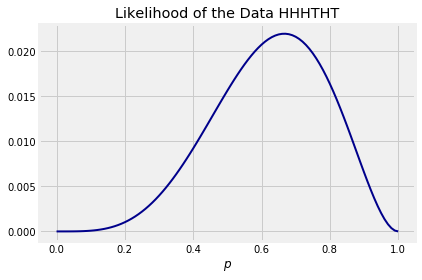

In [2]:
# NO CODE 

num_heads = 4
num_tails = 2
p = np.arange(0, 1.0005, 0.01)
likelihood = (p ** num_heads) * ((1-p) ** num_tails)
plt.plot(p, likelihood, lw=2, color='darkblue')
plt.xlabel('$p$')
plt.title('Likelihood of the Data HHHTHT');

You can see that the value of $p$ that maximizes the likelihood looks suspiciously like $2/3$, the observed proportion of heads in our data HHHTHT. Let's see why that is true.

In [3]:
# VIDEO: Maximizing Likelihood (Discrete Case)
from IPython.display import YouTubeVideo

YouTubeVideo('AN6y89dfNCM')

### Maximum Likelihood Estimate of $p$ Based on a Bernoulli $(p)$ Sample ###

Let $X_1, X_2, \ldots, X_n$ be an i.i.d. Bernoulli $(p)$ sample. Our goal is to find the MLE of $p$.

The random variables are discrete, so the likelihood function is defined as the joint probability mass function evaluated at the sample, as a function of $p$. 

In our example, 

$$
Lik(p) ~ = ~ p \cdot p \cdot p \cdot (1-p) \cdot p \cdot (1-p) ~ = ~ p^4(1-p)^2
$$ 

The likelihood depends on the number of 1's, just as in the binomial probability formula. The combinatorial term is missing because we are observing each element of the sequence.

You'll soon see the reason for using the strange notation $Lik$. Please just accept it for now.

Notice that the likelihood function depends on the data. Therefore, the value of the function is a random variable. For a general i.i.d. Bernoulli $(p)$ sample, the likelihood function is calculated as follows.

**Likelihood function: Discrete Case**

Let $X = X_1 + X_2 + \ldots + X_n$ be the number of 1's in the sample. The likelihood function is

$$
Lik(p) = p^X (1-p)^{n-X}
$$

For each $p$, the value of $Lik(p)$ is the likelihood of the data if $p$ is the probability of heads. 

Our goal is to find the value $\hat{p}$ that maximizes this likelihood over all the possible values of $p$, that is, over the interval $(0, 1)$. 

One way to do this is by calculus. To make the calculus simpler, we recall a crucial observation we have made before:

Taking the $\log$ turns the product into a sum, which simplifies calculation. Also, $\log$ is an increasing function. Hence **the value of $p$ that maximizes the likelihood function is the same as the value of $p$ that maximizes the log of the likelihood function.**

**Log-likelihood function**

Let $L$ be the log of the likelihood function, also known as the *log likelihood function*. You can see the letter l appearing repeatedly in the terminology. Since we'll be doing most of our work with the log likelihood function, we are calling it $L$ and using $Lik$ for the likelihood function.

$$
L(p) = X\log(p) + (n-X)\log(1-p)
$$

The function $L$ is easier to work with than $Lik$. We just have to carry out the calculus.

**Differentiate the log-likelihood function with respect to $p$:**

$$
\frac{d}{dp} L(p) = \frac{X}{p} - \frac{n-X}{1-p}
$$

The *maximum likelihood estimate* (MLE) of $p$ is the value $\hat{p}$ that maximizes the log-likelihood $L$. Statisticians have long used the "hat" symbol to denote estimates. 

**Set the derivative equal to 0 and solve for the MLE**

$$
\frac{X}{\hat{p}} - \frac{n-X}{1-\hat{p}} = 0
$$

Hence

$$
(1-\hat{p})X = (n-X)\hat{p} ~~~~~ \text{so} ~~~~~ X = n\hat{p}
$$

Therefore the MLE of $p$ is

$$ 
\hat{p} = \frac{X}{n} = \frac{1}{n}\sum_{i=1}^n X_i
$$

That is, the MLE of $p$ is the sample proportion of 1's. To compute this estimate, all you need is the number of 1's in the sample. You don't need to see the entire sample as a sequence of 0's and 1's. 

Because the MLE $\hat{p}$ is the sample proportion, it is unbiased, has SD $\sqrt{p(1-p)/n}$, and is asymptotically normal. When $n$ is large you can estimate the SD based on the sample and therefore construct confidence intervals for $p$. 

To be very careful, we should check that this calculation yields a maximum and not a minimum, but given the answer you will surely accept that it's a max. You are welcome to take the second derivative of $L$ and check that we do indeed have a maximum.

In [4]:
# VIDEO: Maximizing Likelihood (Density Case)

YouTubeVideo('KPVK4t58zPY')

### MLE of $\mu$ Based on a Normal $(\mu, \sigma^2)$ Sample ###

Let $X_1, X_2, \ldots, X_n$ be an i.i.d. normal $(\mu, \sigma^2)$ sample. The sample mean is a pretty good estimate of $\mu$, as you know. In this example we will show that it is the maximum likelihood estimate of $\mu$.

What if you want to estimate $\sigma$ as well? We will tackle that problem at the end of this section. For now, let's just estimate $\mu$.

**Likelihood Function: Density Case**

In the density case, the likelihood function is defined as the joint density of the sample evaluated at the observed values, considered as a function of the parameter. That's a bit of a mouthful but it becomes clear once you see the calculation. The joint density in this example is the product of $n$ normal $(\mu, \sigma^2)$ density functions, and hence the likelihood function is

$$
Lik(\mu) ~ = ~ \prod_{i=1}^n \frac{1}{\sqrt{2\pi}\sigma} \exp \big{(} -\frac{1}{2} \big{(} \frac{X_i - \mu}{\sigma} \big{)}^2 \big{)}
$$

The quantity $Lik(\mu)$ is called the likelihood of the data $X_1, X_2, \ldots, X_n$ when the mean of the underlying normal distribution is $\mu$. For every fixed $\mu$, $Lik(\mu)$ is a function of the sample and hence is a random variable.

The goal is to find the value of $\mu$ that maximizes this likelihood function over all the possible values that $\mu$ could be. We don't yet know if such a maximizing value exists, but let's try to find it anyway.

To do this we will simplify the likelihood function as much as possible.

$$
Lik(\mu) ~ = ~ \big{(} \frac{1}{\sqrt{2\pi}\sigma} \big{)}^n
\exp \big{(} -\frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \mu)^2 \big{)}
~ = ~ C \exp \big{(} -\frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \mu)^2 \big{)}
$$

where $C$ doesn't depend on $\mu$ and thus won't affect the maximization.

Even in this simplified form, the likelihood function looks difficult to maximize. But as it is a product, we can simplify our calculations still further by taking its log as we did in the binomial example.

The log-likelihood function is

$$
L(\mu) ~ = ~ \log(C) - \frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \mu)^2
$$

Because $\log(C)$ doesn't affect the maximization, and nor does $\sigma$, we have defined a function to calculate $L - \log(C)$ for the sample 52.8, 51.1, 54.2, and 52.5 drawn from the normal $(\mu, 1)$ distribution. Remember that we began this section by comparing 32 and 52 as estimates of $\mu$, based on this sample.

In [5]:
sample = make_array(52.8, 51.1, 54.2, 52.5)
def shifted_log_lik(mu):
    return (-1/2) * sum((sample - mu)**2)

Here is a graph of the function for $\mu$ in the interval $(30, 70)$.

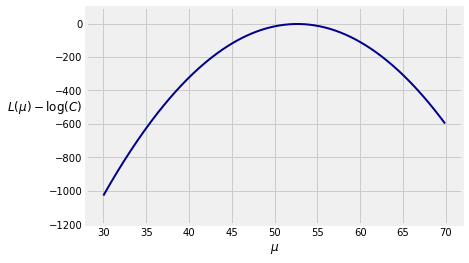

In [6]:
# NO CODE
mu = np.arange(30, 70, 0.1)
l = Table().with_column('Mu', mu).apply(shifted_log_lik, 0)
plt.plot(mu, l, color='darkblue', lw=2 )
plt.xlabel('$\mu$')
plt.ylabel('$L(\mu) - \log(C)$', rotation=0)
plt.ylim(-1200, 100);

The maximizing value of $\mu$ is somewhere around $52.5$. To find exactly where it is, we have to complete the maximizatin. 

Find the derivative of $L$ with respect to $\mu$. Use the Chain Rule and be careful about negative signs.

$$
\frac{d}{d\mu} L(\mu) ~ = ~ \frac{2}{2\sigma^2} \sum_{i=1}^n (X_i - \mu)
$$

Now set this equal to $0$ and solve. Let $\hat{\mu}$ be the MLE of $\mu$. Then $\hat{\mu}$ satisfies the following equation.

$$
\sum_{i=1}^n (X_i - \hat{\mu}) ~ = ~ 0 ~~~~~~ \Longleftrightarrow ~~~~~~ \sum_{i=1}^n X_i ~ = ~ n\hat{\mu} ~~~~~~ \Longleftrightarrow ~~~~~~ \hat{\mu} ~ = ~ \frac{1}{n} \sum_{i=1}^n X_i ~ = ~ \bar{X}
$$

Once again we should check that this is a max and not a min, but at this point you will surely be convinced that it is a max.

We have shown that the MLE of $\mu$ is the sample mean $\bar{X}$, regardless of the population SD $\sigma$. In the case of the sample we used for the plot above, $\bar{X} = 52.65$.

In [7]:
np.mean(sample)

52.650000000000006

You know that the distribution of $\bar{X}$ is normal with mean $\mu$ and variance $\sigma^2/n$. If you don't know $\sigma$, then if the sample is large you can estimate $\sigma$ by the SD of the sample and hence construct confidence intervals for $\mu$.

### Steps for Finding the MLE ###
Let's capture our sequence of steps in an algorithm to find the MLE of a parameter given an i.i.d. sample. See the **Computational Notes** at the end of this section for other ways of finding the MLE.

- Write the likelihood of the sample. The goal is to find the value of the parameter that maximizes this likelihood.
- To make the maximization easier, take the log of the likelihood function. 
- To maximize the log likelihood with respect to the parameter, take its derivative with respect to the parameter.
- Set the derivative equal to 0 and solve; the solution is the MLE.

### Properties of the MLE ###
In the two examples above, the MLE is unbiased and either exactly normal or asymptotically normal. In general, MLEs need not be unbiased, as you will see in an example below. However, under some regularity conditions on the underlying probability distribution or mass function, when the sample is large the MLE is:

- *consistent*, that is, likely to be close to the parameter 
- roughly normal and almost unbiased 

Establishing this is outside the scope of this class, but in exercises you will observe these properties through simulation.

Though there is beautiful theory about the asymptotic variance of the MLE, in practice it can be hard to estimate the variance analytically. This can make it hard to find formulas for confidence intervals. However, you can use the bootstrap to estimate the variance: each bootstrapped sample yields a value of the MLE, and you can construct confidence intervals based on the empirical distribution of the bootstrapped MLEs.

### MLEs of $\mu$ and $\sigma$ Based on a Normal $(\mu, \sigma^2)$ Sample ###


Let $X_1, X_2, \ldots, X_n$ be an i.i.d. normal $(\mu, \sigma^2)$ sample. We will now find the MLEs of both $\mu$ and $\sigma$.

**Likelihood Function**

We have to think of this as a function of both $\mu$ and $\sigma$:

$$
Lik(\mu, \sigma) ~ = ~ \prod_{i=1}^n \frac{1}{\sqrt{2\pi}\sigma} \exp \big{(} -\frac{1}{2} \big{(} \frac{X_i - \mu}{\sigma} \big{)}^2 \big{)} ~ = ~
C \cdot \frac{1}{\sigma^n} \prod_{i=1}^n \exp \big{(} -\frac{1}{2\sigma^2} (X_i - \mu)^2 \big{)}
$$

where $C = 1/(\sqrt{2\pi})^n$ does not affect the maximization.

**Log-Likelihood Function**

$$
L(\mu, \sigma) ~ = ~ \log(C) - n\log(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \mu)^2
$$

**Maximizing the Log Likelihood Function**

We will maximize $L$ in two stages:

- First fix $\sigma$ and maximize with respect to $\mu$.
- Then plug in the maximizing value of $\mu$ and maximize the resulting function with respect to $\sigma$.

We have already completed the first stage in the first example of this section. For each fixed $\sigma$, the maximizing value of $\mu$ is $\hat{\mu} = \bar{X}$.

So now our job is to find the value $\hat{\sigma}$ that maximizes the new function

$$
L^*(\sigma) ~ = ~ -n\log(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \bar{X})^2 ~ = ~ -n\log(\sigma) - \frac{1}{2\sigma^2} V
$$

where $V = \sum_{i=1}^n (X_i - \bar{X})^2$ doesn't depend on $\sigma$. Differentiate with respect to $\sigma$; keep track of minus signs and factors of 2.

$$
\frac{d}{d\sigma} L^*(\sigma) ~ = ~ -\frac{n}{\sigma} + \frac{1}{\sigma^3}V
$$

Set this equal to 0 and solve for the maximizing value $\hat{\sigma}$.

$$
-\frac{n}{\hat{\sigma}} + \frac{1}{\hat{\sigma}^3}V ~ = ~ 0 
~~~~~~~ \Longleftrightarrow ~~~~~~~ \hat{\sigma}^2 ~ = ~ \frac{V}{n} ~ = ~ 
\frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2
$$

Again you should check that this yields a maximum and not a minimum, but again given the answer you will surely accept that it's a max. 

You have shown in exercises that $\hat{\sigma}^2$ is *not* an unbiased estimate of $\sigma^2$. You have also shown that it is close to unbiased when $n$ is large.

To summarize our result, if $X_1, X_2, \ldots , X_n$ is an i.i.d. normal $(\mu, \sigma^2)$ sample, then the MLEs of $\mu$ and $\sigma$ are given by:
- $\hat{\mu} = \bar{X}$
- $\hat{\sigma} = \sqrt{\hat{\sigma}^2}$ where $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2$

It is a remarkable fact about i.i.d. normal samples that $\hat{\mu}$ and $\hat{\sigma}^2$ are independent of each other even though they are statistics calculated from the same sample. Later in this course you will see why.

**Computational Notes** 

- The goal is to find the value of the parameter that maximizes the likelihood. Sometimes, you can do that without any calculus, just by observing properties of the likelihood function. See the Exercises.
- MLEs can't always be derived analytically as easily as in our examples. It's important to keep in mind that maximizing log likelihood functions can often be intractable without a numerical optimization method. 
- Not all likelihood functions have unique maxima.